#**1. Mount the google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Datasets**
Yelp review dataset

In [ ]:
import pandas as pd
path="/content/drive/MyDrive/GCN_TripRecommendation/datasets/yelp_training_set_review.csv"

df=pd.read_csv(path)


In [ ]:
df.nunique()

Unnamed: 0                229907
business_blank                 1
business_categories         2060
business_city                 61
business_full_address      10337
business_id                11537
business_latitude           8946
business_longitude          8958
business_name               8315
business_neighborhoods         0
business_open                  2
business_review_count        293
business_stars                 9
business_state                 4
business_type                  1
cool                          53
date                        2504
funny                         49
review_id                 229907
reviewer_average_stars       331
reviewer_blank                 2
reviewer_cool               1116
reviewer_funny              1027
reviewer_name               8323
reviewer_review_count        854
reviewer_type                  1
reviewer_useful             1329
stars                          5
text                      229659
type                           1
useful    

In [ ]:
print(df.business_id,df.stars,df.user_id)
df.head(5)



0         9yKzy9PApeiPPOUJEtnvkg
1         ZRJwVLyzEJq1VAihDhYiow
2         6oRAC4uyJCsJl1X0WZpVSA
3         _1QQZuf4zZOyFCvXc0o6Vg
4         6ozycU1RpktNG2-1BroVtw
                   ...          
229902    vnffHkFJbmd-J3OaBbK2Eg
229903    l5oUrgQ190l8CcN8uzd_pA
229904    -EctXOb3B7T177jGYUhjVA
229905    YQvg0JCGRFUkb6reMMf3Iw
229906    gKxOZvQTTd5hpFa3r5igGQ
Name: business_id, Length: 229907, dtype: object 0         5
1         5
2         4
3         5
4         5
         ..
229902    2
229903    1
229904    4
229905    3
229906    5
Name: stars, Length: 229907, dtype: int64 0         rLtl8ZkDX5vH5nAx9C3q5Q
1         0a2KyEL0d3Yb1V6aivbIuQ
2         0hT2KtfLiobPvh6cDC8JQg
3         uZetl9T0NcROGOyFfughhg
4         vYmM4KTsC8ZfQBg-j5MWkw
                   ...          
229902    6e7pZofhDuIlD_rX2oYirQ
229903    dDNfSFT0VApxPmURclX6_g
229904    M5wHt6Odh1k5v0tIjqd8DQ
229905    jopndPrv-H5KW2CfScnw9A
229906    mbRUG6h0Mgb2XIJvscIoMg
Name: user_id, Length: 229907, dtype: object


,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
0,0,False,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,331,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,1,False,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,NaN,...,2,Paul,2,user,0,5,I have no idea why some people give bad review...,review,0,0a2KyEL0d3Yb1V6aivbIuQ
2,2,False,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,NaN,...,0,Nicole,3,user,3,4,love the gyro plate. Rice is so good and I als...,review,1,0hT2KtfLiobPvh6cDC8JQg
3,3,False,Active Life; Dog Parks; Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,NaN,...,18,lindsey,31,user,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,uZetl9T0NcROGOyFfughhg
4,4,False,Tires; Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,NaN,...,3,Roger,28,user,32,5,General Manager Scott Petello is a good egg!!!...,review,0,vYmM4KTsC8ZfQBg-j5MWkw


In [ ]:
max(df["business_id"].value_counts())
# it means the table is heterogenous ?

844

In [ ]:
x = df.to_numpy()
x.shape # [num_movie_nodes x movie_node_feature_dim]

(229907, 32)

Kaggle dataset - indonesia reviews

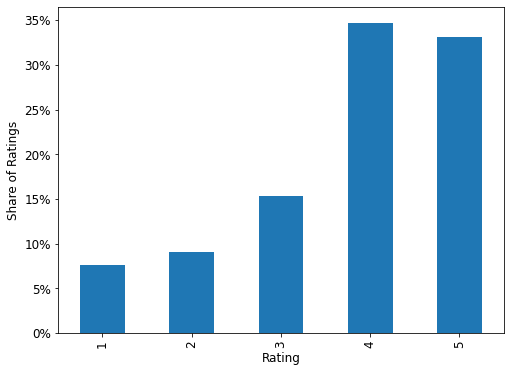

In [ ]:
from matplotlib import pyplot as plt    

fig = plt.figure()
ax = df.stars.value_counts(True).sort_index().plot.bar(figsize=(8,6))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Share of Ratings', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.savefig('Ratings_distribution.png')

what kind of table it has to be heterogenous need to extract the user, edges, node features to represent it in a graph format.

In [ ]:
path="/content/drive/MyDrive/GCN_TripRecommendation/datasets/Indonesia_Traveldatasets/package_tourism.csv"

In [ ]:
ff=pd.read_csv(path)

In [ ]:
df_ratings = pd.read_csv('/content/drive/MyDrive/GCN_TripRecommendation/datasets/Indonesia_Traveldatasets/tourism_rating.csv')
df_movies = pd.read_csv('/content/drive/MyDrive/GCN_TripRecommendation/datasets/Indonesia_Traveldatasets/tourism_with_id.csv')

merged1 = pd.merge(df_ratings, df_movies, on='Place_Id', how='left')
df_user=pd.read_csv('/content/drive/MyDrive/GCN_TripRecommendation/datasets/Indonesia_Traveldatasets/user.csv')
merged2=pd.merge(merged1, df_user, on='User_Id', how='left')

In [ ]:
merged2.describe

<bound method NDFrame.describe of       User_Id  Place_Id  Place_Ratings                         Place_Name  \
0           1       179              3                    Candi Ratu Boko   
1           1       344              2                      Pantai Marina   
2           1         5              5           Atlantis Water Adventure   
3           1       373              3             Museum Kereta Ambarawa   
4           1       101              4      Kampung Wisata Sosro Menduran   
...       ...       ...            ...                                ...   
9995      300       425              2        Waterpark Kenjeran Surabaya   
9996      300        64              4     Museum Sasmita Loka Ahmad Yani   
9997      300       311              3                 The Lodge Maribaya   
9998      300       279              4  Masjid Agung Trans Studio Bandung   
9999      300       163              2                Watu Mabur Mangunan   

                                         

In [ ]:
fifa_df = merged2.sort_values(by="Rating", ascending=False)
print("Players: ", fifa_df.shape[0])
fifa_df.Place_Ratings

Players:  10000


6139    2
6168    2
9457    4
9420    5
9736    2
       ..
2379    1
6872    3
2326    4
8421    4
2466    3
Name: Place_Ratings, Length: 10000, dtype: int64

In [ ]:
print("Players: ", fifa_df.shape[0])
fifa_df.head()

Players:  10000


,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12,Location,Age
6139,184,29,2,Wisata Kuliner Pecenongan,Pecenongan merupakan salah satu surga kuliner ...,Pusat Perbelanjaan,Jakarta,0,5.0,NaN,"{'lat': -6.166788700000001, 'lng': 106.8265261}",-6.166789,106.826526,NaN,29,"Serang, Banten",30
6168,185,124,2,Kauman Pakualaman Yogyakarta,Pakualaman adalah sebuah kecamatan di Kota Yog...,Budaya,Yogyakarta,0,5.0,NaN,"{'lat': -7.801034700000001, 'lng': 110.3751922}",-7.801035,110.375192,NaN,124,"Cilacap, Jawa Tengah",33
9457,285,69,4,Freedom Library,Freedom Library adalah perpustakaan buku yang ...,Budaya,Jakarta,0,5.0,NaN,"{'lat': -6.202248200000001, 'lng': 106.8451968}",-6.202248,106.845197,NaN,69,"Jakarta Pusat, DKI Jakarta",29
9420,283,29,5,Wisata Kuliner Pecenongan,Pecenongan merupakan salah satu surga kuliner ...,Pusat Perbelanjaan,Jakarta,0,5.0,NaN,"{'lat': -6.166788700000001, 'lng': 106.8265261}",-6.166789,106.826526,NaN,29,"Bogor, Jawa Barat",37
9736,293,95,2,Desa Wisata Sungai Code Jogja Kota,"Kampung Code berada di Kelurahan Kotabaru, Kec...",Taman Hiburan,Yogyakarta,0,5.0,NaN,"{'lat': -7.822908900000001, 'lng': 110.3756894}",-7.822909,110.375689,NaN,95,"Subang, Jawa Barat",34


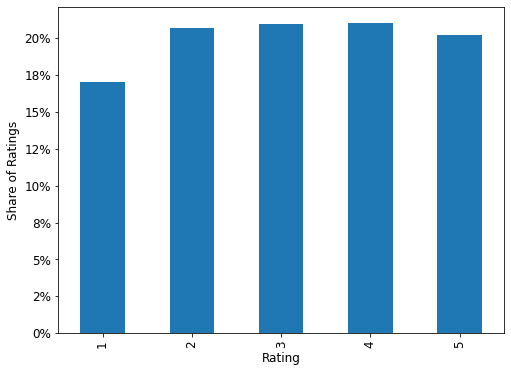

In [ ]:
from matplotlib import pyplot as plt    

fig = plt.figure()
ax = fifa_df.Place_Ratings.value_counts(True).sort_index().plot.bar(figsize=(8,6))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Share of Ratings', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.savefig('Ratings_distribution.png')

** need to check if the rating is 1 to 5 similar to the movies dataset in indonesia dataset as well as in the yelp reviews stars field dataset

# **3. To implement Graph structure importing necessary packages**

In [ ]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

1.12.1+cu113


In [ ]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html 
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

     |████████████████████████████████| 8.9 MB 3.0 MB/s 
     |████████████████████████████████| 3.5 MB 2.9 MB/s 
     |████████████████████████████████| 280 kB 5.1 MB/s 


In [ ]:
!pip install -U -q PyDrive
!pip install -q git+https://github.com/snap-stanford/deepsnap.git

In [ ]:
random_seed = 1
torch.manual_seed(random_seed)

# **4. import required modules**

In [ ]:
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import torch
from torch import nn, optim, Tensor

In [ ]:
import torch_geometric

In [ ]:
from torch_sparse import SparseTensor, matmul

In [ ]:
# packages for importing the GCN model

from torch_geometric.utils import structured_negative_sampling
from torch_geometric.data import download_url, extract_zip
from torch_geometric.nn.conv.gcn_conv import gcn_norm
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.typing import Adj

# **5. Load the dataset**

We have yelp reviews - that contains information about the users and businesses.It shows the relation of how the users rated the business/trips.

In [ ]:
# download the Yelp dataset .csv file
# This will download the CSV file from the google drive.

import pandas as pd

review_path="/content/drive/MyDrive/GCN_TripRecommendation/datasets/yelp_training_set_review.csv"


In [ ]:
# load user and review nodes
def load_node_csv(path, index_col):
    """Loads csv containing node information

    Args:
        path (str): path to csv file
        index_col (str): column name of index column

    Returns:
        dict: mapping of csv row to node id
    """
    df = pd.read_csv(path, index_col=index_col)
    mapping = {index: i for i, index in enumerate(df.index.unique())}
    return mapping

# This method basically creates a dictionary containing index for unique user or business id.

In [ ]:
reviews=pd.read_csv(review_path)

In [ ]:
reviews.head()

,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
0,0,False,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,331,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,1,False,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,NaN,...,2,Paul,2,user,0,5,I have no idea why some people give bad review...,review,0,0a2KyEL0d3Yb1V6aivbIuQ
2,2,False,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,NaN,...,0,Nicole,3,user,3,4,love the gyro plate. Rice is so good and I als...,review,1,0hT2KtfLiobPvh6cDC8JQg
3,3,False,Active Life; Dog Parks; Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,NaN,...,18,lindsey,31,user,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,uZetl9T0NcROGOyFfughhg
4,4,False,Tires; Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,NaN,...,3,Roger,28,user,32,5,General Manager Scott Petello is a good egg!!!...,review,0,vYmM4KTsC8ZfQBg-j5MWkw


create unique mappings

In [ ]:
user_mapping = load_node_csv(review_path, index_col='user_id')
review_mapping = load_node_csv(review_path, index_col='business_id')

In [ ]:
# Homogenous graph with no disticntion between users and business
# load edges between users and business
def load_edge_csv(path, src_index_col, src_mapping, dst_index_col,dst_mapping, link_index_col,rating_threshold):
    """Loads csv containing edges between users and items

    Args:
        path (str): path to csv file
        src_index_col (str): column name of users
        src_mapping (dict): mapping between row number and user id
        dst_index_col (str): column name of items
        dst_mapping (dict): mapping between row number and item id
        link_index_col (str): column name of user item interaction
        rating_threshold (int, optional): Threshold to determine positivity of edge. Defaults to 4.

    Returns:
        torch.Tensor: 2 by N matrix containing the node ids of N user-item edges
    """
    df = pd.read_csv(path)
    edge_index = None
    src = [src_mapping[index] for index in df[src_index_col]]
    # list comprehension
    # creates src list for users, dst list for items with index values
    dst = [dst_mapping[index] for index in df[dst_index_col]]
    edge_attr = torch.from_numpy(df[link_index_col].values).view(-1, 1).to(torch.long) >= rating_threshold
  # Assigns edge between the user and the item if the user has rated the place/business with rating >=4
    edge_index = [[],[]]
    for i in range(edge_attr.shape[0]):
        if edge_attr[i]:
            edge_index[0].append(src[i])
            edge_index[1].append(dst[i])
            
    # returns a tensor object of the indices which are yet to be converted to embeddings to be given to a model
    return torch.tensor(edge_index)




In [ ]:
edge_index = load_edge_csv(
    review_path,
    src_index_col='user_id',
    src_mapping=user_mapping,
    dst_index_col='business_id',
    dst_mapping=review_mapping,
    link_index_col='stars',
    rating_threshold=4,
    # To preprocess the data to include ratings >=4 as we would like to recommend these businsess/places to users
)

# **6. Display a sample homogenous bipartite Graph**

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite  # Conversion function

In [ ]:
G = nx.Graph()

In [ ]:
# bipartite.is_bipartite(G)

True

In [ ]:
user_source=["rLtl8ZkDX5vH5nAx9C3q5Q", "0a2KyEL0d3Yb1V6aivbIuQ","0hT2KtfLiobPvh6cDC8JQg","uZetl9T0NcROGOyFfughhg","vYmM4KTsC8ZfQBg-j5MWkw"]
review_target=["9yKzy9PApeiPPOUJEtnvkg", "ZRJwVLyzEJq1VAihDhYiow", "6oRAC4uyJCsJl1X0WZpVSA", "_1QQZuf4zZOyFCvXc0o6Vg","6ozycU1RpktNG2-1BroVtw"]

In [ ]:
# Initialise the graph
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
top_nodes = ["rLtl8ZkDX5vH5nAx9C3q5Q","0a2KyEL0d3Yb1V6aivbIuQ","0hT2KtfLiobPvh6cDC8JQg","uZetl9T0NcROGOyFfughhg","vYmM4KTsC8ZfQBg-j5MWkw"]
bottom_nodes = ["9yKzy9PApeiPPOUJEtnvkg", "ZRJwVLyzEJq1VAihDhYiow", "6oRAC4uyJCsJl1X0WZpVSA", "_1QQZuf4zZOyFCvXc0o6Vg","6ozycU1RpktNG2-1BroVtw","wzP2yNpV5p04nh0injjymA"]
B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)
# Add edges with weights
B.add_edge("rLtl8ZkDX5vH5nAx9C3q5Q", "9yKzy9PApeiPPOUJEtnvkg", weight = 5)
B.add_edge("rLtl8ZkDX5vH5nAx9C3q5Q", "wzP2yNpV5p04nh0injjymA", weight = 4)
B.add_edge("0a2KyEL0d3Yb1V6aivbIuQ", "ZRJwVLyzEJq1VAihDhYiow", weight = 5)
B.add_edge("0hT2KtfLiobPvh6cDC8JQg", "6oRAC4uyJCsJl1X0WZpVSA", weight = 4)
B.add_edge("uZetl9T0NcROGOyFfughhg", "_1QQZuf4zZOyFCvXc0o6Vg", weight = 5)
B.add_edge("vYmM4KTsC8ZfQBg-j5MWkw", "6ozycU1RpktNG2-1BroVtw", weight = 5)


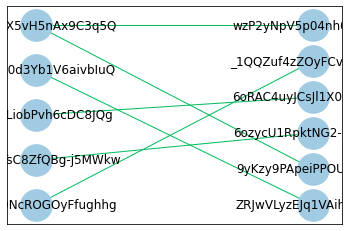

In [ ]:
nx.draw_networkx(B, pos = nx.bipartite_layout(B, top_nodes), node_color='#A0CBE2',edge_color='#00bb5e',node_size=1000,width=1,
     edge_cmap=plt.cm.Blues,with_labels=True)


#**7. Train/validation/test split**

In [ ]:
# Representing the adjacency matrix as sparsetensor as the matrix has most values as zero
# This representation reduces memory head

num_users, num_places = len(user_mapping), len(review_mapping)

#shape of the edge_index ie., link between user and places nodes is flattened
num_interactions = edge_index.shape[1]

In [ ]:
edge_index.shape

torch.Size([2, 156071])

In [ ]:
print(num_users)
print(num_places)
print(num_interactions) # total no of edges

45981
11537
156071


In [ ]:
#all_indicides hold all the index values for the graph_index in an array format 
all_indices = [i for i in range(num_interactions)]

# uses sklearn.model_selection.train_test_split package to split the 3 sets train, validation and test,
# but the underlying input graph remains the same

# of all the indices it splits the 20% to test_indices and its (complement) 80% to train_indicies
train_indices, test_indices = train_test_split(all_indices, test_size=0.1, random_state=1)

# of the test_indicies, it splits 10% to test_indicies and its (complement) 10% to val_indices
val_indices, test_indices = train_test_split(test_indices, test_size=0.5, random_state=1)

In [ ]:
all_indices[num_interactions-1]

156070

In [ ]:
# As we are doing link/edge prediction we are splitting this edge information to 3 sets train, validation and test
# proportion of edges are as follows 80% --> train; 10% --> test; 10% --> validation

# The [:, :] stands for everything from the beginning to the end just like for lists

# The below statement assigns the interaction edges which were generated for the homogenous graph to the appropriate proportion
# to that particular

# we take the edges (tuples between user and places ie., the link information) and split to test and train datasets

train_edge_index = edge_index[:, train_indices]
val_edge_index = edge_index[:, val_indices]
test_edge_index = edge_index[:, test_indices]

In [ ]:
# # convert edge indices into Sparse Tensors: https://pytorch-geometric.readthedocs.io/en/latest/notes/sparse_tensor.html
# # Here the edge_index format (interaction graph) is converted to sparsetensor (mainly used for matrices with more zero values)
# # used for GNN models, this format is given as input to the models beneath.

# train_sparse_edge_index = SparseTensor(row=train_edge_index[0], col=train_edge_index[1], sparse_sizes=(
#     num_users + num_places, num_users + num_places))
# val_sparse_edge_index = SparseTensor(row=val_edge_index[0], col=val_edge_index[1], sparse_sizes=(
#     num_users + num_places, num_users + num_places))
# test_sparse_edge_index = SparseTensor(row=test_edge_index[0], col=test_edge_index[1], sparse_sizes=(
#     num_users + num_places, num_users + num_places))

In [ ]:
train_rowinput = torch.cat([train_edge_index[0], num_users + train_edge_index[1]])
train_colinput = torch.cat([num_users + train_edge_index[1], train_edge_index[1]])

val_rowinput = torch.cat([val_edge_index[0], num_users + val_edge_index[1]])
val_colinput = torch.cat([num_users + val_edge_index[1], val_edge_index[1]])

test_rowinput = torch.cat([test_edge_index[0], num_users + test_edge_index[1]])
test_colinput = torch.cat([num_users + test_edge_index[1], test_edge_index[1]])

train_sparse_edge_index = SparseTensor(row=train_rowinput, col=train_colinput, sparse_sizes=(
    num_users + num_places, num_users + num_places))
val_sparse_edge_index = SparseTensor(row=val_rowinput, col=val_colinput, sparse_sizes=(
    num_users + num_places, num_users + num_places))
test_sparse_edge_index = SparseTensor(row=test_rowinput, col=test_colinput, sparse_sizes=(
    num_users + num_places, num_users + num_places))

# **9. Mini Batch for postive, negative samples**

Positive samples (random picking from the dataset) --> the edges existing between the user and the place whose rating >=4

Negative samples --> complement of the dataset 
For example: A user has not given any rating to that place(user did not visit the place)

or the user place ratings < 4

In [ ]:
# function which random samples a mini-batch of positive and negative samples
def sample_mini_batch(batch_size, edge_index):
    """Randomly samples indices of a minibatch given an adjacency matrix

    Args:
        batch_size (int): minibatch size
        edge_index (torch.Tensor): 2 by N list of edges

    Returns:
        tuple: user indices, positive item indices, negative item indices
    """
    edges = structured_negative_sampling(edge_index,contains_neg_self_loops=False,num_nodes=num_places)
    edges = torch.stack(edges, dim=0)
    indices = random.choices(
        [i for i in range(edges[0].shape[0])], k=batch_size)
    batch = edges[:, indices]
    user_indices, pos_item_indices, neg_item_indices = batch[0], batch[1], batch[2]
    return user_indices, pos_item_indices, neg_item_indices

# **8. Implementing LightGCN**

In [ ]:
# defines LightGCN model

# The below model uses torch_geometric.nn package for defining the LightGCN model
# The model is from https://pytorch-geometric.readthedocs.io/en/latest/notes/create_gnn.html

# packages used torch_geometric.nn.conv.gcn_conv for normalization, torch_geometric.nn.conv for MessagePassing

class LightGCN(MessagePassing):
    """LightGCN Model as proposed in https://arxiv.org/abs/2002.02126
    """
    
    # This _init_method lets the class initialize the objects (constructor)
    #Initializes the Light GCN model

    def __init__(self, num_users, num_places, embedding_dim=64, K=3, add_self_loops=False):
        """Initializes LightGCN Model

        Args:
            num_users (int): Number of users
            num_places (int): Number of places/business
            embedding_dim (int, optional): Dimensionality of embeddings. Defaults to 8.
            K (int, optional): Number of message passing layers. Defaults to 3.
            add_self_loops (bool, optional): Whether to add self loops for message passing. Defaults to False.
        """

        super().__init__()
        # refers to the parent class objects that were created above

        # The PyTorch module, nn.Embedding as seen below will assign each node an embedding vector 
        # such that we have an embedding matrix Z where each row is the d-dimensional embedding vector for a node in our graph

        self.num_users, self.num_places = num_users, num_places
        # assigns the users and places/business similar to the existing original paper code

        self.embedding_dim, self.K = embedding_dim, K
        # the embedding dimesion values and no of message passing layers are defined in the init method.

        self.add_self_loops = add_self_loops
        # Here there are no self loops as it is a bipartite graph.
        
        # calculating the base 64 embedding vectors for the user and places(items) (upto 8)
        # This 
        self.users_emb = nn.Embedding(
            num_embeddings=self.num_users, embedding_dim=self.embedding_dim) # e_u^0

        self.items_emb = nn.Embedding(
            num_embeddings=self.num_places, embedding_dim=self.embedding_dim) # e_i^0

        # parameter initilzation of the initial weights 
        # initalization of weights for the embedding matrix for user, place(business)


        # torch.nn.init.normal_(tensor, mean=0.0, std=1.0) -->Fills the input Tensor with values drawn from the normal distribution 
        # setting standard deviation = 0.1 instead of 1 (overriding the normal distribution which is 1 by setting standard deviation parameters)
        nn.init.normal_(self.users_emb.weight, std=0.1)
        # gaussian distribution(general distribution) mean =0, variance =1 (normal distribution)
        # setting parametes for neural network
        nn.init.normal_(self.items_emb.weight, std=0.1)

# Message passing and aggregation functions are mentioned below

    def forward(self, edge_index: SparseTensor):
        """Forward propagation of LightGCN Model.

        Args:
            edge_index (SparseTensor): adjacency matrix

        Returns:
            tuple (Tensor): e_u_k, e_u_0, e_i_k, e_i_0
        """
        # e_u_k(embeddings of the user at kth layer), e_u_0, e_i_k, e_i_0
        # compute \tilde{A}: symmetrically normalized adjacency matrix
        
        # The goal of normalization is to transform features to be on a similar scale. 
        # This improves the performance and training stability of the model
        edge_index_norm = gcn_norm(
            edge_index, add_self_loops=self.add_self_loops)
        
        # print("edge_index_norm is",edge_index_norm)

        # Concatenates the given sequence of seq tensors in the given dimension.
        # concatenates the weights  
        # [num_users*embedding_dim] size = self.users_emb.weight size

        #Combining for the final embedding
        emb_0 = torch.cat([self.users_emb.weight, self.items_emb.weight]) # E^0
        # print("emb_0:",emb_0)
        # ipdb.set_trace()
        # converting the item to python list, to increase the dimensions; to create a fake 1 dimension
        embs = [emb_0]
        # print("embs",embs)
        # (a model takes batch_size as 1st dimension, 1* dimension of item within the list --> size  )
        emb_k = emb_0
        # print("emb_k",emb_k)
        # to get the diffusion matrix 
        # multi-scale diffusion
        for i in range(self.K):
            
            # self.propagate is for propagating the messages
            # updating the node
            emb_k = self.propagate(edge_index_norm, x=emb_k)
            embs.append(emb_k)

        embs = torch.stack(embs, dim=1)
        emb_final = torch.mean(embs, dim=1) # E^K

        users_emb_final, items_emb_final = torch.split(
            emb_final, [self.num_users, self.num_places]) # splits into e_u^K and e_i^K

        # returns e_u^K, e_u^0, e_i^K, e_i^0
        return users_emb_final, self.users_emb.weight, items_emb_final, self.items_emb.weight

    def message(self, x_j: Tensor) -> Tensor:
        return x_j

    def message_and_aggregate(self, adj_t: SparseTensor, x: Tensor) -> Tensor:
        # computes \tilde{A} @ x
        # does the matrix multiplication like in the matrix factorization
        return matmul(adj_t, x)

model = LightGCN(num_users, num_places)


In [ ]:
# model.forward(train_sparse_edge_index)

edge_index_norm is SparseTensor(row=tensor([    0,     0,     0,  ..., 45975, 45976, 45978]),
             col=tensor([   0,    5,   26,  ..., 9906, 2247,  967]),
             val=tensor([0.0074, 0.0350, 0.0202,  ..., 1.0000, 0.3162, 0.2357]),
             size=(57518, 57518), nnz=124856, density=0.00%)


(tensor([[-0.0468, -0.0083,  0.0387,  ..., -0.0058,  0.0469,  0.0184],
         [ 0.0108, -0.0003,  0.0211,  ..., -0.0124, -0.0106,  0.0283],
         [ 0.0096, -0.0936,  0.0431,  ...,  0.1237, -0.1163,  0.0997],
         ...,
         [ 0.0258, -0.0252,  0.0144,  ...,  0.0178, -0.0232,  0.0174],
         [ 0.0108,  0.0111,  0.0016,  ..., -0.0128, -0.0205,  0.0008],
         [-0.0175,  0.0071,  0.0195,  ..., -0.0023, -0.0226, -0.0198]],
        grad_fn=<SplitWithSizesBackward0>), Parameter containing:
 tensor([[-0.0900,  0.0049,  0.0371,  ..., -0.0004,  0.0612, -0.0060],
         [ 0.0431, -0.0010,  0.0846,  ..., -0.0496, -0.0423,  0.1130],
         [ 0.0096, -0.0936,  0.0431,  ...,  0.1237, -0.1163,  0.0997],
         ...,
         [ 0.0887, -0.0473,  0.0762,  ...,  0.0457, -0.0281,  0.0537],
         [ 0.0433,  0.0444,  0.0063,  ..., -0.0512, -0.0819,  0.0033],
         [-0.0699,  0.0283,  0.0781,  ..., -0.0090, -0.0904, -0.0793]],
        requires_grad=True), tensor([[ 0.0363,  0.02

In [ ]:
# nn.Embedding(num_embeddings=num_users, embedding_dim=64)

Embedding(45981, 64)

In [ ]:
# Below code is for Loss function for adjusting the weights

# To train the LightGCN model, we need an objective function that aligns with our goal for movie recommendation.
# We use the Bayesian Personalized Ranking (BPR) loss,
# which encourages observed user-item predictions to have increasingly higher values than unobserved ones

def bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final, pos_items_emb_0, neg_items_emb_final, neg_items_emb_0, lambda_val):
    """Bayesian Personalized Ranking Loss as described in https://arxiv.org/abs/1205.2618

    Args:
        users_emb_final (torch.Tensor): e_u_k
        users_emb_0 (torch.Tensor): e_u_0
        pos_items_emb_final (torch.Tensor): positive e_i_k
        pos_items_emb_0 (torch.Tensor): positive e_i_0
        neg_items_emb_final (torch.Tensor): negative e_i_k
        neg_items_emb_0 (torch.Tensor): negative e_i_0
        lambda_val (float): lambda value for regularization loss term

    Returns:
        torch.Tensor: scalar bpr loss value
    """
    reg_loss = lambda_val * (users_emb_0.norm(2).pow(2) +
                             pos_items_emb_0.norm(2).pow(2) +
                             neg_items_emb_0.norm(2).pow(2)) # L2 loss

    pos_scores = torch.mul(users_emb_final, pos_items_emb_final)
    pos_scores = torch.sum(pos_scores, dim=-1) # predicted scores of positive samples
    neg_scores = torch.mul(users_emb_final, neg_items_emb_final)
    neg_scores = torch.sum(neg_scores, dim=-1) # predicted scores of negative samples

    loss = -torch.mean(torch.nn.functional.softplus(pos_scores - neg_scores)) + reg_loss

    return loss

In [ ]:
# helper function to get N_u
def get_user_positive_items(edge_index):
    """Generates dictionary of positive items for each user

    Args:
        edge_index (torch.Tensor): 2 by N list of edges

    Returns:
        dict: dictionary of positive items for each user
    """
    user_pos_items = {}
    for i in range(edge_index.shape[1]):
        user = edge_index[0][i].item()
        item = edge_index[1][i].item()
        if user not in user_pos_items:
            user_pos_items[user] = []
        user_pos_items[user].append(item)
    return user_pos_items

In [ ]:
# computes recall@K and precision@K
def RecallPrecision_ATk(groundTruth, r, k):
    """Computers recall @ k and precision @ k

    Args:
        groundTruth (list): list of lists containing highly rated items of each user
        r (list): list of lists indicating whether each top k item recommended to each user
            is a top k ground truth item or not
        k (intg): determines the top k items to compute precision and recall on

    Returns:
        tuple: recall @ k, precision @ k
    """
    num_correct_pred = torch.sum(r, dim=-1)  # number of correctly predicted items per user
    # number of items liked by each user in the test set
    user_num_liked = torch.Tensor([len(groundTruth[i])
                                  for i in range(len(groundTruth))])
    recall = torch.mean(num_correct_pred / user_num_liked)
    precision = torch.mean(num_correct_pred / k)
    return recall.item(), precision.item()

In [ ]:
# computes NDCG@K
def NDCGatK_r(groundTruth, r, k):
    """Computes Normalized Discounted Cumulative Gain (NDCG) @ k

    Args:
        groundTruth (list): list of lists containing highly rated items of each user
        r (list): list of lists indicating whether each top k item recommended to each user
            is a top k ground truth item or not
        k (int): determines the top k items to compute ndcg on

    Returns:
        float: ndcg @ k
    """
    assert len(r) == len(groundTruth)

    test_matrix = torch.zeros((len(r), k))

    for i, items in enumerate(groundTruth):
        length = min(len(items), k)
        test_matrix[i, :length] = 1
    max_r = test_matrix
    idcg = torch.sum(max_r * 1. / torch.log2(torch.arange(2, k + 2)), axis=1)
    dcg = r * (1. / torch.log2(torch.arange(2, k + 2)))
    dcg = torch.sum(dcg, axis=1)
    idcg[idcg == 0.] = 1.
    ndcg = dcg / idcg
    ndcg[torch.isnan(ndcg)] = 0.
    return torch.mean(ndcg).item()

In [ ]:
# wrapper function to get evaluation metrics
def get_metrics(model, edge_index, exclude_edge_indices, k):
    """Computes the evaluation metrics: recall, precision, and ndcg @ k

    Args:
        model (LighGCN): lightgcn model
        edge_index (torch.Tensor): 2 by N list of edges for split to evaluate
        exclude_edge_indices ([type]): 2 by N list of edges for split to discount from evaluation
        k (int): determines the top k items to compute metrics on

    Returns:
        tuple: recall @ k, precision @ k, ndcg @ k
    """
    user_embedding = model.users_emb.weight
    item_embedding = model.items_emb.weight

    # get ratings between every user and item - shape is num users x num movies
    rating = torch.matmul(user_embedding, item_embedding.T)

    for exclude_edge_index in exclude_edge_indices:
        # gets all the positive items for each user from the edge index
        user_pos_items = get_user_positive_items(exclude_edge_index)
        # get coordinates of all edges to exclude
        exclude_users = []
        exclude_items = []
        for user, items in user_pos_items.items():
            exclude_users.extend([user] * len(items))
            exclude_items.extend(items)

        # set ratings of excluded edges to large negative value
        rating[exclude_users, exclude_items] = -(1 << 10)

    # get the top k recommended items for each user
    _, top_K_items = torch.topk(rating, k=k)

    # get all unique users in evaluated split
    users = edge_index[0].unique()

    test_user_pos_items = get_user_positive_items(edge_index)

    # convert test user pos items dictionary into a list
    test_user_pos_items_list = [
        test_user_pos_items[user.item()] for user in users]

    # determine the correctness of topk predictions
    r = []
    for user in users:
        ground_truth_items = test_user_pos_items[user.item()]
        label = list(map(lambda x: x in ground_truth_items, top_K_items[user]))
        r.append(label)
    r = torch.Tensor(np.array(r).astype('float'))

    recall, precision = RecallPrecision_ATk(test_user_pos_items_list, r, k)
    ndcg = NDCGatK_r(test_user_pos_items_list, r, k)

    return recall, precision, ndcg

In [ ]:
# wrapper function to evaluate model
def evaluation(model, edge_index, sparse_edge_index, exclude_edge_indices, k, lambda_val):
    """Evaluates model loss and metrics including recall, precision, ndcg @ k

    Args:
        model (LighGCN): lightgcn model
        edge_index (torch.Tensor): 2 by N list of edges for split to evaluate
        sparse_edge_index (sparseTensor): sparse adjacency matrix for split to evaluate
        exclude_edge_indices ([type]): 2 by N list of edges for split to discount from evaluation
        k (int): determines the top k items to compute metrics on
        lambda_val (float): determines lambda for bpr loss

    Returns:
        tuple: bpr loss, recall @ k, precision @ k, ndcg @ k
    """
    # get embeddings
    users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
        sparse_edge_index)
    edges = structured_negative_sampling(
        edge_index, contains_neg_self_loops=False,num_nodes=num_places)
    user_indices, pos_item_indices, neg_item_indices = edges[0], edges[1], edges[2]
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    loss = bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final, pos_items_emb_0,
                    neg_items_emb_final, neg_items_emb_0, lambda_val).item()

    recall, precision, ndcg = get_metrics(
        model, edge_index, exclude_edge_indices, k)

    return loss, recall, precision, ndcg

# **9.Training**

In [ ]:
# define contants
ITERATIONS = 10000
BATCH_SIZE = 4096
LR = 1e-3
ITERS_PER_EVAL = 200
ITERS_PER_LR_DECAY = 400
K = 20
LAMBDA = 1e-6

In [ ]:
# setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}.")

# moves model to gpu device
model = model.to(device)

# keeps model in training model; other model is eval mode
model.train()

optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

edge_index = edge_index.to(device) 
train_edge_index = train_edge_index.to(device)
train_sparse_edge_index = train_sparse_edge_index.to(device)

val_edge_index = val_edge_index.to(device)
val_sparse_edge_index = val_sparse_edge_index.to(device)

Using device cpu.


In [ ]:
val_edge_index.shape[1]

7804

In [ ]:
test_edge_index.shape[1]

7804

[Iteration 0/10000] train_loss: -0.70625, val_loss: -0.70133, val_recall@20: 0.00128, val_precision@20: 0.00012, val_ndcg@20: 0.00075
[Iteration 200/10000] train_loss: -4.8457, val_loss: -1.29861, val_recall@20: 0.01419, val_precision@20: 0.00118, val_ndcg@20: 0.00573
[Iteration 400/10000] train_loss: -26.92994, val_loss: -5.1121, val_recall@20: 0.02074, val_precision@20: 0.00167, val_ndcg@20: 0.0078
[Iteration 600/10000] train_loss: -65.54023, val_loss: -11.34988, val_recall@20: 0.02203, val_precision@20: 0.00179, val_ndcg@20: 0.00818
[Iteration 800/10000] train_loss: -110.82533, val_loss: -19.84102, val_recall@20: 0.02317, val_precision@20: 0.00183, val_ndcg@20: 0.00858
[Iteration 1000/10000] train_loss: -171.7164, val_loss: -29.45604, val_recall@20: 0.0243, val_precision@20: 0.0019, val_ndcg@20: 0.00905
[Iteration 1200/10000] train_loss: -242.46625, val_loss: -41.12779, val_recall@20: 0.0269, val_precision@20: 0.00211, val_ndcg@20: 0.00972
[Iteration 1400/10000] train_loss: -297.719

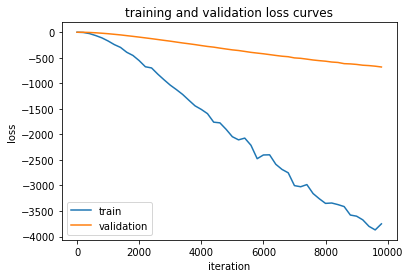

In [ ]:
train_losses = []
val_losses = []

for iter in range(ITERATIONS):
    # forward propagation
    users_emb_final, users_emb_0,  items_emb_final, items_emb_0 = model.forward(train_sparse_edge_index)

    # mini batching  
    user_indices, pos_item_indices, neg_item_indices = sample_mini_batch(
        BATCH_SIZE, train_edge_index)
    user_indices, pos_item_indices, neg_item_indices = user_indices.to(
        device), pos_item_indices.to(device), neg_item_indices.to(device)
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    # loss computation
    train_loss = bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final,
                          pos_items_emb_0, neg_items_emb_final, neg_items_emb_0, LAMBDA)

    optimizer.zero_grad()
    # doing backpropogation
    train_loss.backward()
    optimizer.step()

# How many training iterations need to be run before doing evaluation -->iters_per_eval
# Just a counter value
    if iter % ITERS_PER_EVAL == 0:
        model.eval()
        val_loss, recall, precision, ndcg = evaluation(
            model, val_edge_index, val_sparse_edge_index, [train_edge_index], K, LAMBDA)
        print(f"[Iteration {iter}/{ITERATIONS}] train_loss: {round(train_loss.item(), 5)}, val_loss: {round(val_loss, 5)}, val_recall@{K}: {round(recall, 5)}, val_precision@{K}: {round(precision, 5)}, val_ndcg@{K}: {round(ndcg, 5)}")
        train_losses.append(train_loss.item())
        val_losses.append(val_loss)
        model.train()
# after ITERS_PER_LR_DECAY of no of iterations the learning rate is reduced., every iters_per_lr_decay steps.
    if iter % ITERS_PER_LR_DECAY == 0 and iter != 0:
        scheduler.step()

iters = [iter * ITERS_PER_EVAL for iter in range(len(train_losses))]
plt.plot(iters, train_losses, label='train')
plt.plot(iters, val_losses, label='validation')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('training and validation loss curves')
plt.legend()
plt.show()


Evaluate the validation and test sets

In [ ]:

# evaluate on test set
model.eval()
# basically evaluates the model
test_edge_index = test_edge_index.to(device)
test_sparse_edge_index = test_sparse_edge_index.to(device)

test_loss, test_recall, test_precision, test_ndcg = evaluation(
            model, test_edge_index, test_sparse_edge_index, [train_edge_index], K, LAMBDA)

print(f"[test_loss: {round(test_loss, 5)}, test_recall@{K}: {round(test_recall, 5)}, test_precision@{K}: {round(test_precision, 5)}, test_ndcg@{K}: {round(test_ndcg, 5)}")

# evaluate on train set
# model.eval()
train_edge_index = train_edge_index.to(device)
train_sparse_edge_index = train_sparse_edge_index.to(device)

train_loss, train_recall, train_precision, train_ndcg = evaluation(
            model, train_edge_index, train_sparse_edge_index, [test_edge_index, val_edge_index], K, LAMBDA)

print(f"[train_loss: {round(train_loss, 5)}, train_recall@{K}: {round(train_recall, 5)}, train_precision@{K}: {round(train_precision, 5)}, train_ndcg@{K}: {round(train_ndcg, 5)}")

# evaluate on validation set
# model.eval()
val_edge_index = val_edge_index.to(device)
val_sparse_edge_index = val_sparse_edge_index.to(device)

val_loss, val_recall, val_precision, val_ndcg = evaluation(
            model, val_edge_index, val_sparse_edge_index, [train_edge_index], K, LAMBDA)

print(f"[val_loss: {round(val_loss, 5)}, val_recall@{K}: {round(val_recall, 5)}, val_precision@{K}: {round(val_precision, 5)}, val_ndcg@{K}: {round(val_ndcg, 5)}")

[test_loss: -614.13184, test_recall@20: 0.03711, test_precision@20: 0.00277, test_ndcg@20: 0.01469
[train_loss: -3350.74829, train_recall@20: 0.03588, train_precision@20: 0.00794, train_ndcg@20: 0.02018
[val_loss: -695.36768, val_recall@20: 0.03176, val_precision@20: 0.00262, val_ndcg@20: 0.0128


Make recommendations

In [ ]:
"""# Make New Recommendatios for a Given User"""

model.eval()
df = pd.read_csv(review_path)
business_city = pd.Series(df.business_name.values,index=df.business_id).to_dict()
# business_categories = pd.Series(df.business_categories.values,index=df.business_id).to_dict()

user_pos_items = get_user_positive_items(edge_index)

def make_predictions(user_id, num_recs):
    user = user_mapping[user_id]
    e_u = model.users_emb.weight[user]
    scores = model.items_emb.weight @ e_u # dot product finds similarity between 2 vectors
# @ means dot product (shorthand notation for dot product)
# scores --> finding the similarity scores for that user for all the place embeddings
# similar people will have similar user embeddings, related places have similar places embeddings, based on this it is recommedning.
# to predict whether there is a link or not.
    values, indices = torch.topk(scores, k=len(user_pos_items[user])+num_recs)

    reviews = [index.cpu().item() for index in indices if index in user_pos_items[user]][:num_recs]
    review_ids = [list(review_mapping.keys())[list(review_mapping.values()).index(review)] for review in reviews]
    place = [business_city[id] for id in review_ids]
    # categories = [business_categories[id] for id in review_ids]

    print(f"Here are some places that user {user_id} rated highly")
    for i in range(len(place)):
        # print(f"city: {city[i]}, categories: {categories[i]} ")
        print(f"place: {place[i]}")
    print()

    reviews = [index.cpu().item() for index in indices if index not in user_pos_items[user]][:num_recs]
    review_ids = [list(review_mapping.keys())[list(review_mapping.values()).index(review)] for review in reviews]
    place = [business_city[id] for id in review_ids]
    # categories = [business_categories[id] for id in review_ids]

    print(f"Here are some suggested places for user {user_id}")
    for i in range(num_recs):
        # print(f"title: {city[i]}, genres: {categories[i]} ")
        print(f"place: {place[i]}")
USER_ID = 'uZetl9T0NcROGOyFfughhg'
NUM_RECS = 5

make_predictions(USER_ID, NUM_RECS)

Here are some places that user uZetl9T0NcROGOyFfughhg rated highly

Here are some suggested places for user uZetl9T0NcROGOyFfughhg
place: La Grande Orange Grocery
place: Four Peaks Brewing Co
place: SanTan Brewing Company
place: America's Taco Shop
place: Windsor


#**10. PLOT K VARIES GRAPH FOR INDONESIA DATASET**

# Hyperparameter tuning for layers

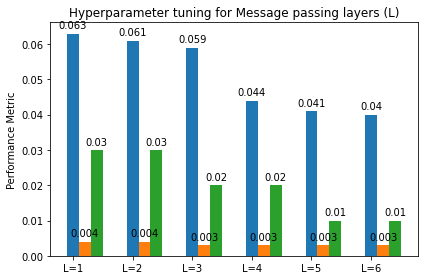

In [ ]:

# import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
  #first is recall,precision and NDCG
    means = [[round(0.06322,3),round(0.06092,3),round(0.05862,3),round(0.04368,3),round(0.04138,3),round(0.04023,3)], [round(0.00414,3), round(0.00379,3), round(0.00345,3),round(0.0031,3), round(0.00276,3),round(0.00276,3)], [round(0.02621,2), round(0.0264,2), round(0.02113,2), round(0.01621,2), round(0.0138,2),round(0.01442,2)]] # asian, american, african
    # std = [[2, 3, 4, 1, 2], [3, 5, 2, 3, 3], [1, 3, 2, 1, 3]] # std (conf. inter.) of above; give None if not avail.
    std = None
    width = 0.2 # width of barplots
    xticklabels = ['L=1', 'L=2', 'L=3', 'L=4', 'L=5', 'L=6']
    ylabel = 'Performance Metric'
    legend = 'Recall@20', 'Precision@20', 'NDCG@20'
    title = 'Hyperparameter tuning for Message passing layers (L)'
    rects, fig, ax, plt = barplot(means, width, xticklabels, ylabel, legend, std, title)

    # placing text above barplots (center, left - left of std line, right - right of std line)
    xpos = ['center', 'center', 'center']
    for i in range(len(legend)):
        barplot_autolabel(rects[i], ax, xpos[i])

    fig.tight_layout()

    plt.show()


In [ ]:
recall=np.array([0.05365,0.08333,0.08105,0.07991,0.05879,0.07021])
recall=np.round(recall,3)


In [ ]:
recall[0]

0.054

In [ ]:
precision=np.array([0.00411,0.00548,0.00514,0.00479,0.00377,0.00411])
precision=np.round(precision,3)


In [ ]:
NDCG=np.array([0.02006,0.02753,0.0268,0.0226,0.02037,0.02275])
NDCG=np.round(NDCG,3)

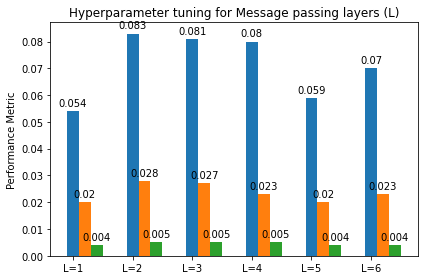

In [ ]:
# import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
  #first is recall,precision and NDCG
    means = [recall,NDCG,precision] # asian, american, african
    # std = [[2, 3, 4, 1, 2], [3, 5, 2, 3, 3], [1, 3, 2, 1, 3]] # std (conf. inter.) of above; give None if not avail.
    std = None
    width = 0.2 # width of barplots
    xticklabels = ['L=1', 'L=2', 'L=3', 'L=4', 'L=5', 'L=6']
    ylabel = 'Performance Metric'
    legend = 'Recall@20', 'NDCG@20','Precision@20'
    title = 'Hyperparameter tuning for Message passing layers (L)'
    rects, fig, ax, plt = barplot(means, width, xticklabels, ylabel, legend, std, title)

    # placing text above barplots (center, left - left of std line, right - right of std line)
    xpos = ['center', 'center', 'center']
    for i in range(len(legend)):
        barplot_autolabel(rects[i], ax, xpos[i])

    fig.tight_layout()

    plt.show()

Hyperparameter tuning for batch size

In [ ]:
recall=np.array([0.07078,0.07363,0.05594,0.07192,0.03082,0.06164])
recall=np.round(recall,3)

In [ ]:
precision=np.array([0.00445,0.00445,0.00377,0.00411,0.00205,0.00377])
precision=np.round(precision,3)

In [ ]:
NDCG=np.array([0.02457,0.0239,0.0165,0.02501,0.01309,0.02022])
NDCG=np.round(NDCG,3)

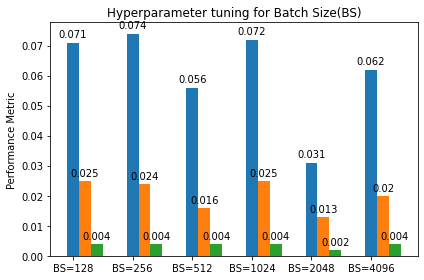

In [ ]:
# import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
  #first is recall,precision and NDCG
    means = [recall,NDCG,precision] # asian, american, african
    # std = [[2, 3, 4, 1, 2], [3, 5, 2, 3, 3], [1, 3, 2, 1, 3]] # std (conf. inter.) of above; give None if not avail.
    std = None
    width = 0.2 # width of barplots
    xticklabels = ['BS=128', 'BS=256', 'BS=512', 'BS=1024', 'BS=2048', 'BS=4096']
    ylabel = 'Performance Metric'
    legend = 'Recall@20', 'NDCG@20','Precision@20'
    title = 'Hyperparameter tuning for Batch Size(BS)'
    rects, fig, ax, plt = barplot(means, width, xticklabels, ylabel, legend, std, title)

    # placing text above barplots (center, left - left of std line, right - right of std line)
    xpos = ['center', 'center', 'center']
    for i in range(len(legend)):
        barplot_autolabel(rects[i], ax, xpos[i])

    fig.tight_layout()

    plt.show()

Hyperparameter tuning for lambda

In [ ]:
recall=np.array([0.05651,0.08676,0.06507,0.07135,0.05765,0.0605])
recall=np.round(recall,3)

In [ ]:
precision=np.array([0.00445,0.00548,0.00377,0.00479,0.00445,0.00411])
precision=np.round(precision,3)

In [ ]:
NDCG=np.array([0.02132,0.03231,0.03242,0.02469,0.02008,0.02135])
NDCG=np.round(NDCG,3)

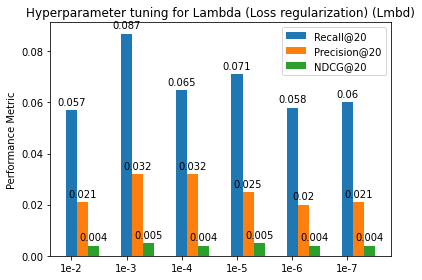

In [ ]:
# import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
  #first is recall,precision and NDCG
    means = [recall,NDCG,precision] # asian, american, african
    # std = [[2, 3, 4, 1, 2], [3, 5, 2, 3, 3], [1, 3, 2, 1, 3]] # std (conf. inter.) of above; give None if not avail.
    std = None
    width = 0.2 # width of barplots
    xticklabels = ['1e-2', '1e-3', '1e-4', '1e-5', '1e-6', '1e-7']
    ylabel = 'Performance Metric'
    legend = 'Recall@20', 'Precision@20', 'NDCG@20'
    title = 'Hyperparameter tuning for Lambda (Loss regularization) (Lmbd)'
    rects, fig, ax, plt = barplot(means, width, xticklabels, ylabel, legend, std, title)

    # placing text above barplots (center, left - left of std line, right - right of std line)
    xpos = ['center', 'center', 'center']
    for i in range(len(legend)):
        barplot_autolabel(rects[i], ax, xpos[i])

    fig.tight_layout()

    plt.show()

#**11.PLOT K VARIES GRAPH FOR YELP REVIEW DATASET**

#layers

In [ ]:
# import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
  #first is recall,precision and NDCG
    means = [[0.06322,0.06092,0.05862,0.04368,0.04138,0.04023], [0.00414, 0.00379, 0.00345, 0.0031, 0.00276,0.00276], [0.02621, 0.0264, 0.02113, 0.01621, 0.0138,0.01442]] # asian, american, african
    # std = [[2, 3, 4, 1, 2], [3, 5, 2, 3, 3], [1, 3, 2, 1, 3]] # std (conf. inter.) of above; give None if not avail.
    std = None
    width = 0.2 # width of barplots
    xticklabels = ['L=1', 'L=2', 'L=3', 'L=4', 'L=5', 'L=6']
    ylabel = 'Performance Metric'
    legend = 'Recall@20', 'Precision@20', 'NDCG@20'
    title = 'Hyperparameter tuning for Message passing layers (L)'
    rects, fig, ax, plt = barplot(means, width, xticklabels, ylabel, legend, std, title)

    # placing text above barplots (center, left - left of std line, right - right of std line)
    xpos = ['center', 'center', 'center']
    for i in range(len(legend)):
        barplot_autolabel(rects[i], ax, xpos[i])

    fig.tight_layout()

    plt.show()

#batchsize

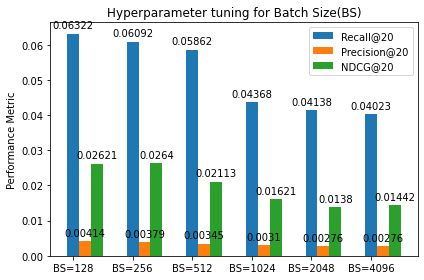

In [ ]:
# import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
  #first is recall,precision and NDCG
    means = [[0.06322,0.06092,0.05862,0.04368,0.04138,0.04023], [0.00414, 0.00379, 0.00345, 0.0031, 0.00276,0.00276], [0.02621, 0.0264, 0.02113, 0.01621, 0.0138,0.01442]] # asian, american, african
    # std = [[2, 3, 4, 1, 2], [3, 5, 2, 3, 3], [1, 3, 2, 1, 3]] # std (conf. inter.) of above; give None if not avail.
    std = None
    width = 0.2 # width of barplots
    xticklabels = ['BS=128', 'BS=256', 'BS=512', 'BS=1024', 'BS=2048', 'BS=4096']
    ylabel = 'Performance Metric'
    legend = 'Recall@20', 'Precision@20', 'NDCG@20'
    title = 'Hyperparameter tuning for Batch Size(BS)'
    rects, fig, ax, plt = barplot(means, width, xticklabels, ylabel, legend, std, title)

    # placing text above barplots (center, left - left of std line, right - right of std line)
    xpos = ['center', 'center', 'center']
    for i in range(len(legend)):
        barplot_autolabel(rects[i], ax, xpos[i])

    fig.tight_layout()

    plt.show()

lambda

In [ ]:
recall=np.array([0.00103,0.00094,0.01721,0.03357,0.03396,0.03619])
recall=np.round(recall,3)

In [ ]:
precision=np.array([6e-05,5e-05,0.00141,0.00267,0.00273,0.00292])
precision=np.round(precision,3)

In [ ]:
NDCG=np.array([0.00032,0.00034,0.00702,0.01381,0.01431,0.01558])
NDCG=np.round(NDCG,3)

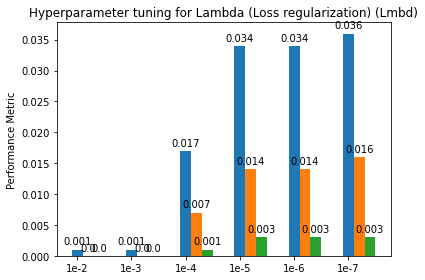

In [ ]:
# import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
  #first is recall,precision and NDCG
    means = [recall,NDCG,precision] # asian, american, african
    # std = [[2, 3, 4, 1, 2], [3, 5, 2, 3, 3], [1, 3, 2, 1, 3]] # std (conf. inter.) of above; give None if not avail.
    std = None
    width = 0.2 # width of barplots
    xticklabels = ['1e-2', '1e-3', '1e-4', '1e-5', '1e-6', '1e-7']
    ylabel = 'Performance Metric'
    legend = 'Recall@20', 'NDCG@20','Precision@20'
    title = 'Hyperparameter tuning for Lambda (Loss regularization) (Lmbd)'
    rects, fig, ax, plt = barplot(means, width, xticklabels, ylabel, legend, std, title)

    # placing text above barplots (center, left - left of std line, right - right of std line)
    xpos = ['center', 'center', 'center']
    for i in range(len(legend)):
        barplot_autolabel(rects[i], ax, xpos[i])

    fig.tight_layout()

    plt.show()

Batch size

In [ ]:
recall=np.array([0.03582,0.03544,0.03635,0.03396,0.03341,0.03591])
recall=np.round(recall,3)

In [ ]:
precision=np.array([0.00288,0.00282,0.00289,0.00273,0.00276,0.00284])
precision=np.round(precision,3)

In [ ]:
NDCG=np.array([0.01506,0.01488,0.01554,0.01431,0.01427,0.01444])
NDCG=np.round(NDCG,3)

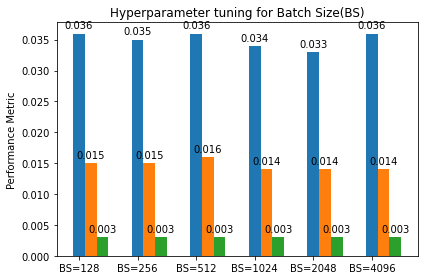

In [ ]:
# import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
  #first is recall,precision and NDCG
    means = [recall,NDCG,precision] # asian, american, african
    # std = [[2, 3, 4, 1, 2], [3, 5, 2, 3, 3], [1, 3, 2, 1, 3]] # std (conf. inter.) of above; give None if not avail.
    std = None
    width = 0.2 # width of barplots
    xticklabels = ['BS=128', 'BS=256', 'BS=512', 'BS=1024', 'BS=2048', 'BS=4096']
    ylabel = 'Performance Metric'
    legend = 'Recall@20', 'Precision@20', 'NDCG@20'
    title = 'Hyperparameter tuning for Batch Size(BS)'
    rects, fig, ax, plt = barplot(means, width, xticklabels, ylabel, legend, std, title)

    # placing text above barplots (center, left - left of std line, right - right of std line)
    xpos = ['center', 'center', 'center']
    for i in range(len(legend)):
        barplot_autolabel(rects[i], ax, xpos[i])

    fig.tight_layout()

    plt.show()

Layers

In [ ]:
recall=np.array([0.04659,0.04126,0.05765,0.0309,0.02263,0.02316])
recall=np.round(recall,3)

In [ ]:
precision=np.array([0.00365,0.00337,0.00445,0.00237,0.00172,0.00173])
precision=np.round(precision,3)

In [ ]:
NDCG=np.array([0.02005,0.01813,0.02008,0.01372,0.00943,0.00902])
NDCG=np.round(NDCG,3)

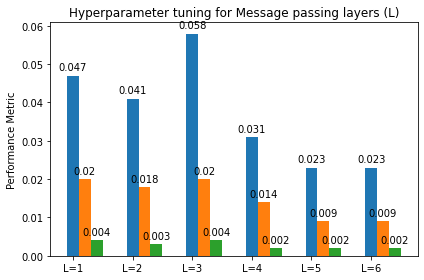

In [ ]:
# import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
  #first is recall,precision and NDCG
    means = [recall,NDCG,precision] # asian, american, african
    # std = [[2, 3, 4, 1, 2], [3, 5, 2, 3, 3], [1, 3, 2, 1, 3]] # std (conf. inter.) of above; give None if not avail.
    std = None
    width = 0.2 # width of barplots
    xticklabels = ['L=1', 'L=2', 'L=3', 'L=4', 'L=5', 'L=6']
    ylabel = 'Performance Metric'
    legend = 'Recall@20', 'Precision@20', 'NDCG@20'
    title = 'Hyperparameter tuning for Message passing layers (L)'
    rects, fig, ax, plt = barplot(means, width, xticklabels, ylabel, legend, std, title)

    # placing text above barplots (center, left - left of std line, right - right of std line)
    xpos = ['center', 'center', 'center']
    for i in range(len(legend)):
        barplot_autolabel(rects[i], ax, xpos[i])

    fig.tight_layout()

    plt.show()

# For final comparision graphs

In [ ]:
recall=np.array([0.03404,0.01274,0.00125])
recall=np.round(recall,3)

In [ ]:
NDCG=np.array([0.01319,0.00664,0.00043])
NDCG=np.round(NDCG,3)

In [ ]:
Precision =np.array([0.00252,0.00083,9e-5])
Precision=np.round(Precision,3)

In [ ]:
# import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
  #first is recall,precision and NDCG
    means = [recall,NDCG,Precision] # asian, american, african
    # std = [[2, 3, 4, 1, 2], [3, 5, 2, 3, 3], [1, 3, 2, 1, 3]] # std (conf. inter.) of above; give None if not avail.
    std = None
    width = 0.2 # width of barplots
    xticklabels = ['Recall@20', 'NDCG@20','Precision@20']
    ylabel = 'Performance Metric'
    legend = 'LightGCN', 'Matrix Factorization', 'Random Baseline'
    title = 'Comparision results for Yelp Reviews'
    rects, fig, ax, plt = barplot(means, width, xticklabels, ylabel, legend, std, title)

    # placing text above barplots (center, left - left of std line, right - right of std line)
    xpos = ['center', 'center', 'center']
    for i in range(len(legend)):
        barplot_autolabel(rects[i], ax, xpos[i])

    fig.tight_layout()

    plt.show()

NameError: ignored

For Indonesia dataset

In [ ]:
recall=np.array([0.09195,0.04195,0.02586])
recall=np.round(recall,3)

In [ ]:
NDCG=np.array([0.03492,0.0162,0.00963])
NDCG=np.round(NDCG,3)

In [ ]:
Precision =np.array([0.00655,0.00379,0.00207])
Precision=np.round(Precision,3)

In [ ]:
# import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
  #first is recall,precision and NDCG
    means = [recall,NDCG,Precision] # asian, american, african
    # std = [[2, 3, 4, 1, 2], [3, 5, 2, 3, 3], [1, 3, 2, 1, 3]] # std (conf. inter.) of above; give None if not avail.
    std = None
    width = 0.2 # width of barplots
    xticklabels = ['Recall@20', 'NDCG@20','Precision@20']
    ylabel = 'Performance Metric'
    legend = 'LightGCN', 'Matrix Factorization', 'Random Baseline'
    title = 'Comparision results for Indonesia Tourism destination'
    rects, fig, ax, plt = barplot(means, width, xticklabels, ylabel, legend, std, title)

    # placing text above barplots (center, left - left of std line, right - right of std line)
    xpos = ['center', 'center', 'center']
    for i in range(len(legend)):
        barplot_autolabel(rects[i], ax, xpos[i])

    fig.tight_layout()

    plt.show()

#**12. GIT Commands**

**Change present working directory**

In [ ]:
%cd /content/drive/MyDrive/GCN_TripRecommendation/datasets

[Errno 2] No such file or directory: '/content/drive/MyDrive/GCN_TripRecommendation/datasets'
/content


In [ ]:
!pwd

/content/drive/MyDrive/GCN_TripRecommendation/datasets


In [ ]:
!ls

'yelp_training_set_review (1).csv'   yelp_user.csv


In [ ]:
!git init

Initialized empty Git repository in /content/drive/MyDrive/GCN_TripRecommendation/.git/


In [ ]:
!git config --global user.email 'sprakki@horizon.csueastbay.edu'
!git config --global user.name 'SravaniPrakki'

In [ ]:
!git add .
!git commit -m 'First commit'

On branch master

Initial commit

nothing to commit


In [ ]:
!ls

yelp_training_set_review.csv


In [ ]:
import pickle
import numpy as np
from matplotlib import rcParams
from cycler import cycler
from matplotlib import pyplot as plt
import os, sys

def format_y(y):
    if isinstance(y, list) and len(y) != 0:
        if isinstance(y[0], list):
            lengths = [len(obj) for obj in y]
            minlength = min(lengths)
            y = [obj[:minlength] for obj in y]
    return y

def plot_figures(output_path, desc, y, xlabel, ylabel, x=None, yerr = None, legend=None, legendloc=None, legendncol=None, title=None, xlim=None, ylim=None, show_plot=False, gen_pkl=True, save_pdf=False, plt_only=False):

    if not plt_only:
        rcParams.update({'font.size': 20})
        plt.ioff()
        plt.rc('axes', prop_cycle=cycler('color',['black', 'red', 'blue', 'black', 'red', 'blue', 'black','red', 'blue', 'black', 'red', 'blue', 'black']) + cycler('marker', ['*', '+', 'x', 'o', '<', '>', 'v', '^', ',', "_", '.', '|', 'X']) + cycler('linestyle', ['-', '--', '-.', ':', '-', '--', '-.',':', '-', '--', '-.',':','-']))
        # this ensures that type-3 fonts are not used when generating figures
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif')
        markersize=11
        linewidth=3
        capsize = 6 # not recognized in plt.rc
        elinewidth = 3 # same
        markeredgewidth = 1
        plt.rc('lines', linewidth=linewidth, markersize=markersize, markeredgewidth=markeredgewidth)
        # plt.gca().set_prop_cycle(cycler('color',['red', 'green', 'blue', 'red', 'green', 'blue','red']))
        # markers = ['*', '+', 'x', 'o', '<', '>', ',']  # http://matplotlib.org/api/markers_api.html
        # linestyles = ['-', '--', '-.', ':', '-', '--', '-.']  # http://matplotlib.org/api/lines_api.html
        # fig = plt.figure(1, figsize=(11.25,7.5))  # width, height
        fig = plt.figure(1, figsize=(7.5,7.5))  # width, height

    y = format_y(y)
    y = np.array(y)

    if yerr is not None:
        yerr = format_y(yerr)
        yerr = np.array(yerr)
        assert np.shape(y) == np.shape(yerr)

    shape = y.shape
    if len(shape) == 1:
        ncols = shape[0]
        nrows = 1
    else:
        nrows, ncols = shape
    if x is None:
        x = range(1,ncols+1)

    if nrows == 1:
        if yerr is None:
            plt.plot(x, y)
        else:
            ax = plt.gca() # use this only if needed
            ax.set_xscale('log')
            # ax.set_yscale('log')
            (_, caps, _) = plt.errorbar(x, y, yerr, capsize=capsize, elinewidth=elinewidth)
            for cap in caps:
                cap.set_markeredgewidth(3)

    else:
        if yerr is None:
            for var_indx in range(nrows):
                plt.plot(x, y[var_indx, :])
        else:
            ax = plt.gca() # use this only if needed
            ax.set_xscale('log')
            for var_indx in range(nrows):
                (_, caps, _) = plt.errorbar(x, y[var_indx, :], yerr[var_indx, :], capsize=capsize, elinewidth=elinewidth)
                for cap in caps:
                    cap.set_markeredgewidth(3)

    # plt.ylim(ymin=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        # legendloc one of ['best', 'upper left', 'center left', 'center', 'lower center']
        plt.legend(legend, loc=legendloc, ncol=legendncol)
    if title is not None:
        plt.title(title)
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    plt.grid(True, which='both')

    os.makedirs(output_path, exist_ok=True)
    if not plt_only:
        fig.tight_layout()
        filename = 'fig_' + desc
        if save_pdf:
            plt.savefig(os.path.join(output_path, filename + '.pdf'))
        plt.savefig(os.path.join(output_path, filename + '.png'))
        if gen_pkl:
            save_object1(fig, os.path.join(output_path, 'pkl', filename + '.pkl'))
        if show_plot:
            plt.show()
        plt.clf()
        plt.close()

def plot_figures_subplot(output_path, desc, y, xlabels, ylabels, x=None, legends=None, legendlocs=None, legendncols=None, show_plot=False, gen_pkl=True, save_pdf=False, save_eps=False):

    rcParams.update({'font.size': 20})
    plt.ioff()
    plt.rc('axes', prop_cycle=cycler('color',['black', 'red', 'blue', 'black', 'red', 'blue', 'black','red', 'blue', 'black', 'red', 'blue', 'black']) + cycler('marker', ['*', '+', 'x', 'o', '<', '>', 'v', '^', ',', "_", '.', '|', 'X']) + cycler('linestyle', ['-', '--', '-.', ':', '-', '--', '-.',':', '-', '--', '-.',':','-']))
    markersize=3
    linewidth=3
    plt.rc('lines', linewidth=linewidth, markersize=markersize)

    # plt.gca().set_prop_cycle(cycler('color',['red', 'green', 'blue', 'red', 'green', 'blue','red']))
    # markers = ['*', '+', 'x', 'o', '<', '>', ',']  # http://matplotlib.org/api/markers_api.html
    # linestyles = ['-', '--', '-.', ':', '-', '--', '-.']  # http://matplotlib.org/api/lines_api.html
    if isinstance(y, list) and len(y) != 0:
        if isinstance(y[0], list):
            lengths = [len(obj) for obj in y]
            minlength = min(lengths)
            y = [obj[:minlength] for obj in y]
    y = np.array(y)
    shape = y.shape
    if len(shape) == 1:
        ncols = shape[0]
        nrows = 1
    else:
        nrows, ncols = shape
    if x is None:
        x = range(1,ncols+1)

    fig,_ = plt.subplots(nrows, 1, figsize=(11.25,7.5))  # width, height

    if legends is None:
        legends = legendlocs = legendncols = [None]*nrows

    for var_indx in range(nrows):
        subplt_indx = (nrows*100) + (1*10) + (var_indx+1)
        plt.subplot(subplt_indx)
        plot_figures('','',y[var_indx,:], xlabels[var_indx],ylabels[var_indx],x,legends[var_indx],legendlocs[var_indx],legendncols[var_indx],plt_only=True)
        # ax[var_indx].plot(x,y[var_indx,:])

    fig.tight_layout()
    filename = 'fig_' + desc
    if save_pdf:
        plt.savefig(output_path + filename + '.pdf')
    if save_eps:
        plt.savefig(output_path + filename + '.eps')
    plt.savefig(output_path + filename + '.png')
    if gen_pkl:
        save_object1(fig, output_path + 'pkl/' + filename + '.pkl')
    if show_plot:
        plt.show()
    plt.clf()
    plt.close()

def plot_figures_old(output_path, desc, y, xlabel, ylabel, x=None, legend=None, legendloc=None, legendncol=None, show_plot=False, gen_pkl=True, save_pdf=False, save_eps=False):

    # rcParams.update({'font.size': 20})
    # plt.ioff()
    # plt.rc('axes', prop_cycle=cycler('color',['black', 'red', 'blue', 'black', 'red', 'blue', 'black','red', 'blue', 'black', 'red', 'blue', 'black']) + cycler('marker', ['*', '+', 'x', 'o', '<', '>', 'v', '^', ',', "_", '.', '|', 'X']) + cycler('linestyle', ['-', '--', '-.', ':', '-', '--', '-.',':', '-', '--', '-.',':','-']))
    # markersize=10
    # linewidth=3
    # plt.rc('lines', linewidth=linewidth, markersize=markersize)
    #
    # # plt.gca().set_prop_cycle(cycler('color',['red', 'green', 'blue', 'red', 'green', 'blue','red']))
    # # markers = ['*', '+', 'x', 'o', '<', '>', ',']  # http://matplotlib.org/api/markers_api.html
    # # linestyles = ['-', '--', '-.', ':', '-', '--', '-.']  # http://matplotlib.org/api/lines_api.html
    # fig = plt.figure(1, figsize=(15, 10))  # width, height
    rcParams.update({'font.size': 20})
    plt.ioff()
    plt.rc('axes', prop_cycle=cycler('color',['black', 'red', 'blue', 'black', 'red', 'blue', 'black','red', 'blue', 'black', 'red', 'blue', 'black']) + cycler('marker', ['*', '+', 'x', 'o', '<', '>', 'v', '^', ',', "_", '.', '|', 'X']) + cycler('linestyle', ['-', '--', '-.', ':', '-', '--', '-.',':', '-', '--', '-.',':','-']))
    markersize=11
    linewidth=3
    capsize = 6 # not recognized in plt.rc
    elinewidth = 3 # same
    markeredgewidth = 1
    plt.rc('lines', linewidth=linewidth, markersize=markersize, markeredgewidth=markeredgewidth)
    # plt.gca().set_prop_cycle(cycler('color',['red', 'green', 'blue', 'red', 'green', 'blue','red']))
    # markers = ['*', '+', 'x', 'o', '<', '>', ',']  # http://matplotlib.org/api/markers_api.html
    # linestyles = ['-', '--', '-.', ':', '-', '--', '-.']  # http://matplotlib.org/api/lines_api.html
    # fig = plt.figure(1, figsize=(11.25,7.5))  # width, height
    fig = plt.figure(1, figsize=(7.5,7.5))  # width, height

    if isinstance(y, list) and len(y) != 0:
        if isinstance(y[0], list):
            lengths = [len(obj) for obj in y]
            minlength = min(lengths)
            y = [obj[:minlength] for obj in y]
    y = np.array(y)
    shape = y.shape
    if len(shape) == 1:
        ncols = shape[0]
        nrows = 1
    else:
        nrows, ncols = shape
    if x is None:
        x = range(1,ncols+1)

    if nrows == 1:
        plt.plot(x, y)
    else:
        for var_indx in range(nrows):
            plt.plot(x, y[var_indx, :])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(legend, loc=legendloc, ncol=legendncol)
    plt.grid()
    fig.tight_layout()
    filename = 'fig_' + desc
    if save_pdf:
        plt.savefig(output_path / (filename + '.pdf'))
    if save_eps:
        plt.savefig(output_path / (filename + '.eps'))
    plt.savefig(output_path / (filename + '.png'))
    if gen_pkl:
        save_object1(fig, output_path / 'pkl/' / (filename + '.pkl'))
    if show_plot:
        plt.show()
    plt.clf()
    plt.close()

def sort_pair_of_lists(list1, list2, reverse=False):
    # sorting will be based on the values of list1 (not list2)
    zipped_pair = zip(list1, list2)
    sorted_zip = sorted(zipped_pair, reverse=reverse)
    list1_sorted = [x for x, _ in sorted_zip]
    list2_sorted = [x for _, x in sorted_zip]
    return [list1_sorted, list2_sorted]

def print_out(s, f=None, new_line=True):
    """Similar to print but with support to flush and output to a file."""
    s = str(s)
    if f:
        f.write(s)
        if new_line:
            f.write("\n")
    # stdout
    print(s, end="", file=sys.stdout)

    if new_line:
        sys.stdout.write("\n")
    sys.stdout.flush()

def save_object1(obj1, filename):
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, 'wb') as output:
        pickle.dump(obj1, output, pickle.HIGHEST_PROTOCOL)

def save_object2(obj1, obj2, filename):
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, 'wb') as output:
        pickle.dump(obj1, output, pickle.HIGHEST_PROTOCOL)
        pickle.dump(obj2, output, pickle.HIGHEST_PROTOCOL)

def read_object1(filename):
    with open(filename, 'rb') as input:
        return pickle.load(input)

def read_object2(filename):
    with open(filename, 'rb') as input:
        first = pickle.load(input)
        second = pickle.load(input)
        return first, second

# Function to get index of ceiling of x in arr[low..high]*/
def ceilSearch(arr, low, high, x):
    # If x is smaller than or equal to the first element,
    # then return the first element */
    if x <= arr[low]:
        return low

        # If x is greater than the last element, then return -1 */
    if x > arr[high]:
        return -1

        # get the index of middle element of arr[low..high]*/
    mid = int ((low + high) / 2)  # low + (high - low)/2 */

    # If x is same as middle element, then return mid */
    if arr[mid] == x:
        return mid

    # If x is greater than arr[mid], then either arr[mid + 1]
    # is ceiling of x or ceiling lies in arr[mid+1...high] */
    # elif arr[mid] < x:
    #     if mid + 1 <= high and x <= arr[mid + 1]:
    #         return mid + 1
    #     else:
    elif arr[mid] < x:
        return ceilSearch(arr, mid + 1, high, x)

    # If x is smaller than arr[mid], then either arr[mid]
    # is ceiling of x or ceiling lies in arr[mid-1...high] */
    else:
        # if mid - 1 >= low and x > arr[mid - 1]:
        #     return mid
        # else:
        return ceilSearch(arr, low, mid, x)

# Binary search function to get index of floor of x in arr[low..high]*/
def floorSearch(arr, low, high, x):
    # If x is smaller than or equal to the first element,
    # then return the first element */
    if x >= arr[high]:
        return high

    # If x is greater than the last element, then return -1 */
    if x < arr[low]:
        return -1

    # get the index of middle element of arr[low..high]*/
    mid = int ((low + high) / 2)  # low + (high - low)/2 */

    # If x is same as middle element, then return mid */
    if arr[mid] == x:
        return mid

    # If x is greater than arr[mid], then floor of x lies in arr[mid...high] */
    # elif arr[mid] < x:
    #     if mid + 1 <= high and x <= arr[mid + 1]:
    #         return mid + 1
    #     else:
    elif arr[mid] < x:
        if x < arr[mid+1]: # this is done to avoid infinite recursion; consider [2,8] and floor(3)
            return mid
        return floorSearch(arr, mid, high, x)

    # If x is smaller than arr[mid], then floor of x lies in arr[low...mid-1] */
    else:
        # if mid - 1 >= low and x > arr[mid - 1]:
        #     return mid
        # else:
        return floorSearch(arr, low, mid-1, x)

def barplot_autolabel(rects, ax, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

def barplot(means, width, xticklabels, ylabel, legend, std=None, title=''):
    fig, ax = plt.subplots()
    ind = np.arange(len(means[0]))
    rects = []
    for i in range(len(means)):
        yerr = std[i] if std is not None else None
        rect = ax.bar(ind + width * i, means[i], width, yerr=yerr, label=legend[i])
        rects.append(rect)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(ind)
    ax.set_xticklabels(xticklabels)
    ax.legend()
    return rects, fig, ax, plt





